##Introduction
###The Stroke Prediction Dataset is a comprehensive dataset available on Kaggle that contains 11 clinical features for predicting stroke events. Stroke is a severe medical condition where poor blood flow to the brain results in cell death. It is one of the leading causes of death and disability worldwide, making accurate prediction and timely intervention critical. This dataset provides valuable data for building predictive models to identify individuals at high risk of stroke.

##Dataset Features
###The dataset includes the following 11 clinical features:

* id: Unique identifier
* gender: Gender of the patient
* age: Age of the patient
* hypertension: 0 if the patient does not have hypertension, 1 if the patient  has hypertension
* heart_disease: 0 if the patient does not have heart disease, 1 if the patient has heart disease
* ever_married: Whether the patient has ever been married (Yes or No)
* work_type: Type of occupation (e.g., children, government job, never worked, private, self-employed)
* Residence_type: Type of residence (Urban or Rural)
* avg_glucose_level: Average glucose level in the blood
* bmi: Body mass index
* smoking_status: Smoking status (formerly smoked, never smoked, smokes, unknown)
* stroke: 1 if the patient had a stroke, 0 if not

##Objective
###The primary objective of this dataset is to develop a predictive model that can accurately identify the likelihood of a stroke based on the clinical features provided. This can assist healthcare professionals in early detection and intervention, potentially saving lives and reducing the burden of stroke-related disabilities.

##Usage
###This dataset is ideal for applying various machine learning algorithms such as logistic regression, decision trees, random forests, and neural networks. It offers an excellent opportunity to explore feature selection, data preprocessing, model training, and evaluation in a real-world healthcare context.

##Source:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

##IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy  as np #NumPy is a powerful tool for numerical computations in Python.
import pandas as pd #Pandas is a powerful library for data manipulation and analysis.

In [2]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv") #The df = pd.read_csv line reads a CSV file into a DataFrame named df using the pandas library.

####We will now read the data from a CSV file into a Pandas DataFrame Let us have a look at how our dataset looks like using df.head()

In [3]:
df.head() #Displays the first few rows of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.columns #Displays the names of the columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape  #Displays the total count of the Rows and Columns respectively.

(5110, 12)

In [6]:
df.info() #Displays the total count of values present in the particular column along with the null count and data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.isnull().sum() #Displays the total count of the null values in the particular columns.

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
for column in df.columns:  #Loop through each column in the DataFrame
    if df[column].isnull().any(): #Check if the column has any missing values (NaNs)
        mean_value = df[column].mean() #Calculate the mean of the column (ignoring NaNs)
        df[column].fillna(mean_value, inplace=True) #Replace NaNs with the mean value

##Purpose and Usage
###The purpose of this code is to handle missing data in a DataFrame by imputing the missing values with the mean of the respective columns. This is a common data preprocessing step to ensure that the dataset is complete and can be used effectively for analysis or machine learning algorithms, which typically cannot handle missing values directly.

###By filling in the missing values with the mean, we are providing a reasonable estimate for the missing data, assuming that the mean is a good representative of the distribution of the values in the column. This method is simple and quick, but it's important to note that it might not always be the best approach for all datasets, especially if the data is not normally distributed or if the presence of missing values is not random.

In [9]:
df.isnull().sum()#Displays the total count of the null values in the particular columns.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###As we have filled the missing values with the average, so now there is no missing values.

In [10]:
from sklearn.preprocessing import LabelEncoder #This line imports the LabelEncoder class from the sklearn.preprocessing module. LabelEncoder is used to convert categorical labels into numeric labels.

# Perform Label Encoding for categorical variables
label_encoder = LabelEncoder() #This line creates an instance of the LabelEncoder class, which will be used to transform the categorical variables into numeric form.
df['gender'] = label_encoder.fit_transform(df['gender']) #This line applies the label encoder to the 'gender' column of the DataFrame df. The fit_transform method both fits the encoder to the 'gender' data and transforms it, replacing the original categorical values with numeric labels.
df['ever_married'] = label_encoder.fit_transform(df['ever_married']) #Similar to the previous step, this line applies label encoding to the 'ever_married' column, converting its categorical values to numeric labels.
df['work_type'] = label_encoder.fit_transform(df['work_type']) #This line encodes the 'work_type' column, transforming each unique category into a corresponding numeric label.
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type']) #This line applies label encoding to the 'Residence_type' column.
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status']) #This line encodes the 'smoking_status' column.


###Why is Label Encoding Needed?
####Label encoding is necessary for several reasons, especially when preparing data for machine learning models:

###1) Machine Learning Algorithms Require Numeric Data:
####Most machine learning algorithms cannot handle categorical data directly. They require input features to be in numeric form. Label encoding converts categorical labels into numeric labels, making the data suitable for these algorithms.

###2) Handling Categorical Variables:
####Categorical variables often contain text values, such as 'Male' and 'Female' in the 'gender' column. By converting these text values to numbers (e.g., 0 and 1), we make it possible for algorithms to process and analyze the data.

###3) Simplifying Data Processing:
####Label encoding simplifies data processing and storage. Instead of dealing with string values, which can be more complex to handle, numeric values are easier to manage and manipulate.

###4) Ensuring Consistency:
####Label encoding ensures consistent and reproducible results. The same category will always be assigned the same numeric label, which is important for maintaining the integrity of the data.

In [11]:
df.head() #now checking after lable encoding to see how the dataframe looks.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


###This code will create a DataFrame df with sample data, compute the correlation matrix, and visualize it using a heatmap. The heatmap will show the correlation coefficients between 'age', 'avg_glucose_level', 'bmi', and 'stroke', helping to understand their relationships visually.

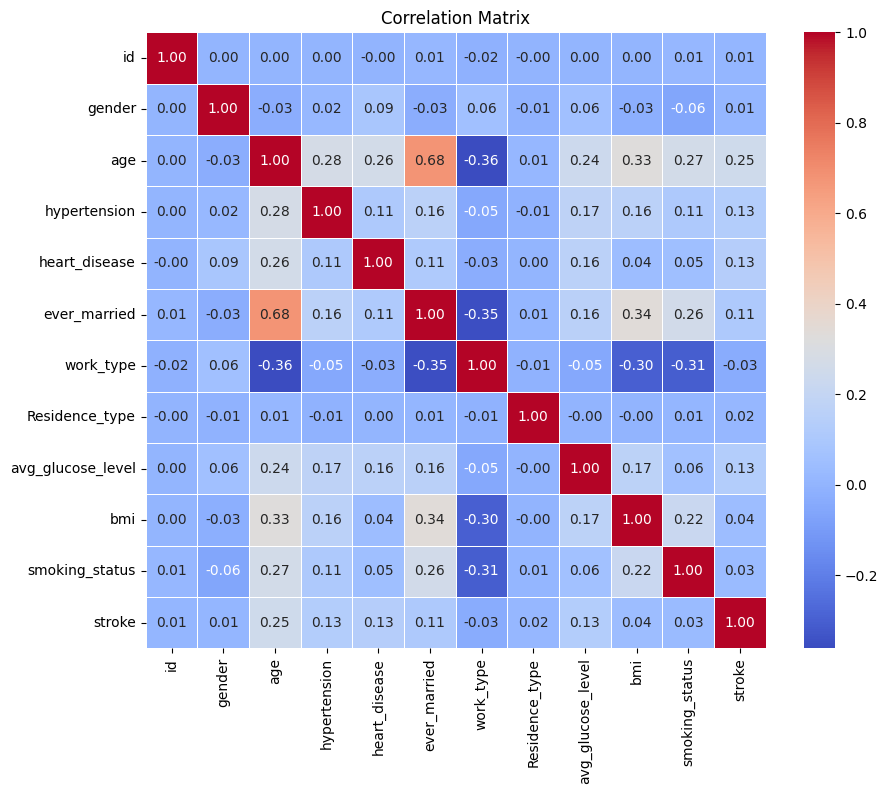

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
x  = df.iloc[ : , :-1].values #This line extracts all the columns except the last one and stores them in the variable x.
print(x) #This line prints the contents of the x array, which contains all the feature values from the DataFrame.
print('-'*40) #This line prints a separator line consisting of 40 hyphens. This is used to visually separate the printed output of the features from the target values.
y = df.iloc[ : , -1].values #This line extracts the last column (assumed to be the target variable) and stores it in the variable y.
print(y) #This line prints the contents of the y array, which contains the target values from the DataFrame.

[[9.04600000e+03 1.00000000e+00 6.70000000e+01 ... 2.28690000e+02
  3.66000000e+01 1.00000000e+00]
 [5.16760000e+04 0.00000000e+00 6.10000000e+01 ... 2.02210000e+02
  2.88932369e+01 2.00000000e+00]
 [3.11120000e+04 1.00000000e+00 8.00000000e+01 ... 1.05920000e+02
  3.25000000e+01 2.00000000e+00]
 ...
 [1.97230000e+04 0.00000000e+00 3.50000000e+01 ... 8.29900000e+01
  3.06000000e+01 2.00000000e+00]
 [3.75440000e+04 1.00000000e+00 5.10000000e+01 ... 1.66290000e+02
  2.56000000e+01 1.00000000e+00]
 [4.46790000e+04 0.00000000e+00 4.40000000e+01 ... 8.52800000e+01
  2.62000000e+01 0.00000000e+00]]
----------------------------------------
[1 1 1 ... 0 0 0]


In [14]:
from sklearn.preprocessing import StandardScaler #This line imports the StandardScaler class from the sklearn.preprocessing module. StandardScaler is used to standardize features by removing the mean and scaling to unit variance.


scaling      = StandardScaler() #This line creates an instance of the StandardScaler class, which will be used to fit and transform the feature data.
scaled_input = scaling.fit_transform(x) #The fit_transform method combines both steps: it first fits the StandardScaler to the data and then transforms the data. The resulting scaled_input array contains the standardized features

scaled_input #This line outputs the scaled feature values.

array([[-1.29831203e+00,  1.18807255e+00,  1.05143428e+00, ...,
         2.70637544e+00,  1.00123401e+00, -3.51780710e-01],
       [ 7.16371490e-01, -8.40343999e-01,  7.86070073e-01, ...,
         2.12155854e+00,  4.61555355e-16,  5.81552327e-01],
       [-2.55478192e-01,  1.18807255e+00,  1.62639008e+00, ...,
        -5.02830130e-03,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-7.93719586e-01, -8.40343999e-01, -3.63841511e-01, ...,
        -5.11442636e-01,  2.21736316e-01,  5.81552327e-01],
       [ 4.84965773e-02,  1.18807255e+00,  3.43796387e-01, ...,
         1.32825706e+00, -4.27845098e-01, -3.51780710e-01],
       [ 3.85694957e-01, -8.40343999e-01,  3.42048064e-02, ...,
        -4.60867458e-01, -3.49895329e-01, -1.28511375e+00]])

##Purpose and Usage
####The purpose of this code is to standardize the features in the dataset. Standardization is an important preprocessing step in many machine learning algorithms for the following reasons:

###1) Normalization:
####Standardization ensures that each feature has a mean of 0 and a standard deviation of 1. This is important for algorithms that are sensitive to the scale of the input features, such as gradient descent-based algorithms.

###2) Improved Convergence:
####For algorithms like gradient descent, having standardized features can lead to faster and more stable convergence. This is because the optimization process benefits from features that are on a similar scale.

###3) Handling Different Units:
####When features have different units or scales (e.g., age in years, income in dollars), standardization ensures that no single feature dominates the others due to its scale.

###4) Consistency:
####Standardization provides a consistent way to preprocess data, making the features more comparable and ensuring that the model's performance is not influenced by varying scales of input features.

In [15]:
from sklearn.model_selection import train_test_split #This line imports the train_test_split function from the sklearn.model_selection module. This function is used to split arrays or matrices into random train and test subsets.

x_train, x_test, y_train, y_test = train_test_split(scaled_input, y, test_size=0.2, random_state=42)

###This line splits the scaled_input and y arrays into training and testing sets. Here's a breakdown of the parameters used:

###scaled_input: The input features to be split.
###y: The target variable to be split.
###test_size=0.2: Specifies that 20% of the data should be used for the test set and 80% for the training set.
###random_state=42: A random seed to ensure reproducibility. Using the same seed will produce the same split every time.

In [16]:
x.shape, y.shape

((5110, 11), (5110,))

###The x.shape and y.shape attributes return the dimensions of the x (features) and y (target) arrays, respectively, indicating the number of samples and features (for x) or target values (for y)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4088, 11), (1022, 11), (4088,), (1022,))

###The x_train.shape, x_test.shape, y_train.shape, and y_test.shape attributes return the dimensions of the training and test sets for features and target variables, showing the number of samples and features (for x_train and x_test) or target values (for y_train and y_test).

In [18]:
from sklearn.ensemble import RandomForestClassifier #The code from sklearn.ensemble import RandomForestClassifier imports the RandomForestClassifier class from scikit-learn,

Random_Forest_Model = RandomForestClassifier() #Random_Forest_Model = RandomForestClassifier() creates an instance of the RandomForestClassifier model.

In [19]:
Random_Forest_Model.fit(x_train,y_train) #Random_Forest_Model.fit(x_train, y_train) trains the RandomForestClassifier model using the training features (x_train) and target values (y_train).

RandomForestClassifier()

In [20]:
y_pred = Random_Forest_Model.predict(x_test) #uses the trained RandomForestClassifier model to make predictions on the test features (x_test)
y_pred #y_pred stores these predicted target values.

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score #Imports the function to calculate accuracy

print("Accuracy_Score:",np.round(accuracy_score(y_test, y_pred),2)*100,"%")
# Computes the accuracy score, rounds it to two decimal places, converts it to a percentage, and prints it

Accuracy_Score: 94.0 %


In [22]:
y_test
#y_test contains the true target values for the test set, used to evaluate the performance of the model's predictions.

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
x_test[2]#.reshape(1,11)
#x_test[2].reshape(1, 11) selects the third test sample and reshapes it into a 2D array with one row and 11 columns for making a single prediction.

array([ 1.62924099, -0.840344  , -1.55798046, -0.32860186, -0.2389468 ,
       -1.3814364 ,  1.68071161,  0.98407974, -0.70071306, -0.83058558,
       -1.28511375])

In [24]:
x_test[2].shape
#x_test[2].shape returns the dimensions of the third test sample, showing it as a 1D array with 11 features.

(11,)

In [25]:
x_test[2].reshape(1,11)
#x_test[2].reshape(1, 11) reshapes the third test sample from a 1D array with 11 features into a 2D array with 1 row and 11 columns for model prediction.

array([[ 1.62924099, -0.840344  , -1.55798046, -0.32860186, -0.2389468 ,
        -1.3814364 ,  1.68071161,  0.98407974, -0.70071306, -0.83058558,
        -1.28511375]])

In [26]:
x_test[2].reshape(1,11).shape
#x_test[2].reshape(1, 11).shape returns the shape of the reshaped third test sample as (1, 11), indicating 1 sample with 11 features.

(1, 11)

In [27]:
print("ACTUAL OUTPUT    : ",y_test[2])
print("PREDICTED OUTPUT : ",Random_Forest_Model.predict(x_test[2].reshape(1,11))[0])

ACTUAL OUTPUT    :  0
PREDICTED OUTPUT :  0


###print("ACTUAL OUTPUT : ", y_test[2]) prints the true target value of the third test sample, and print("PREDICTED OUTPUT : ", Random_Forest_Model.predict(x_test[2].reshape(1,11))[0]) prints the predicted target value for the same sample.